In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Affordable_Housing_by_Town_2011-Present.csv')
df.head()

,Code,Town,Year,2010 Census Units,Gov Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,1,Andover,2016,1317,18,0,22,0,40.0,3.04
1,2,Ansonia,2016,8148,347,658,104,9,1118.0,13.72
2,3,Ashford,2016,1903,32,2,33,0,67.0,3.52
3,4,Avon,2016,7389,244,8,31,0,283.0,3.83
4,5,Barkhamsted,2016,1589,0,7,13,0,20.0,1.26


In [3]:
df.columns

Index(['Code', 'Town', 'Year', '2010 Census Units', 'Gov Assisted',
       'Tenant Rental Assistance', ' Single Family CHFA/ USDA Mortgages',
       'Deed Restricted Units', 'Total Assisted Units', 'Percent Affordable'],
      dtype='object')

In [4]:
df1 = df.groupby(['Year'], as_index=False)['2010 Census Units'].sum()
df2 = df.groupby(['Year'], as_index=False)['Tenant Rental Assistance'].sum()
df3 = df.groupby(['Year'], as_index=False)[' Single Family CHFA/ USDA Mortgages'].sum()
df4 = df.groupby(['Year'], as_index=False)['Deed Restricted Units'].sum()
df5 = df.groupby(['Year'], as_index=False)['Total Assisted Units'].sum()
df6 = pd.merge(df1, df2, on='Year')
df7 = pd.merge(df6, df3, on='Year')
df8 = pd.merge(df7, df4, on='Year')
df9 = pd.merge(df8, df5, on='Year')
df9 = df9.set_index('Year') 
df9

,2010 Census Units,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units
Year,,,,,
2011,1487891,41613,26217,5481,159520.00
2012,1487891,42649,26829,5692,161379.00
2013,1487891,44504,29652,5868,167504.00
2014,1487891,41637,29874,5893,168655.00
2015,1455446,41504,30869,5509,170562.14
2016,1487891,42658,26006,5647,164998.00


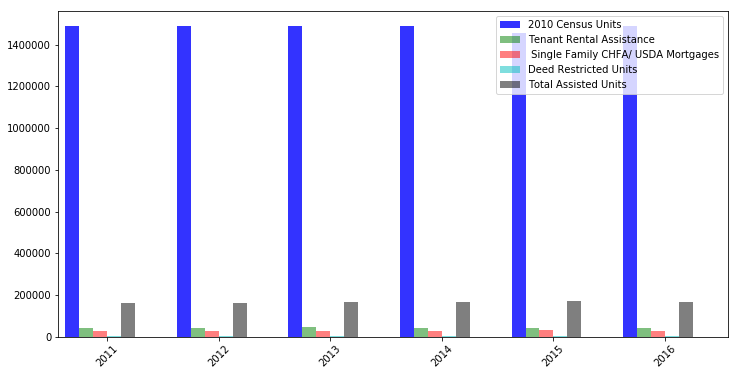

In [5]:
from mlxtend.plotting import stacked_barplot
fig = stacked_barplot(df9, rotation=45, legend_loc='best')

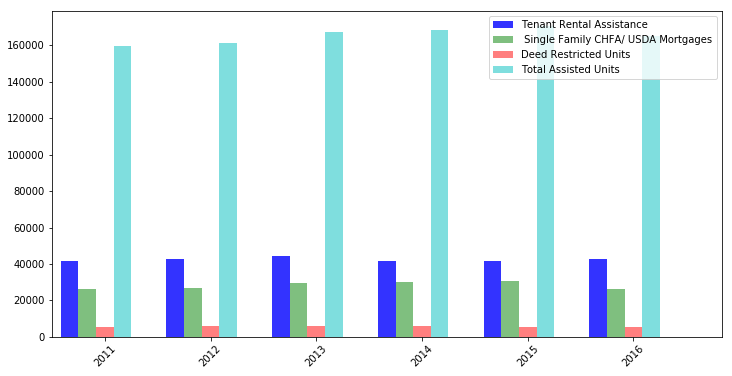

In [6]:
df9 = df9.drop(['2010 Census Units'], axis=1)
fig1 = stacked_barplot(df9, rotation=45, legend_loc='best')

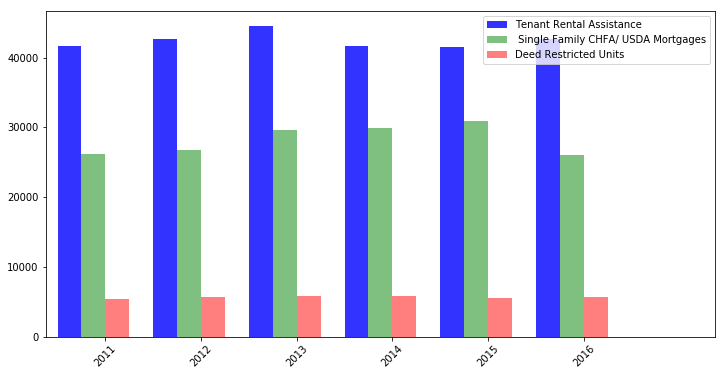

In [7]:
df9 = df9.drop(['Total Assisted Units'], axis=1)
fig2 = stacked_barplot(df9, rotation=45, legend_loc='best')

In [8]:
df['%AssistedUnits'] = (df['Total Assisted Units']/df['2010 Census Units'])*100
df.head()

,Code,Town,Year,2010 Census Units,Gov Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable,%AssistedUnits
0,1,Andover,2016,1317,18,0,22,0,40.0,3.04,3.037206
1,2,Ansonia,2016,8148,347,658,104,9,1118.0,13.72,13.721159
2,3,Ashford,2016,1903,32,2,33,0,67.0,3.52,3.520757
3,4,Avon,2016,7389,244,8,31,0,283.0,3.83,3.830018
4,5,Barkhamsted,2016,1589,0,7,13,0,20.0,1.26,1.258653


In [9]:
df.columns

Index(['Code', 'Town', 'Year', '2010 Census Units', 'Gov Assisted',
       'Tenant Rental Assistance', ' Single Family CHFA/ USDA Mortgages',
       'Deed Restricted Units', 'Total Assisted Units', 'Percent Affordable',
       '%AssistedUnits'],
      dtype='object')

In [10]:
df_n = pd.read_csv('Real_Estate_Sales_2001-2016.csv')
df_n1 = df_n.loc[df_n['PropertyType']=='Residential']

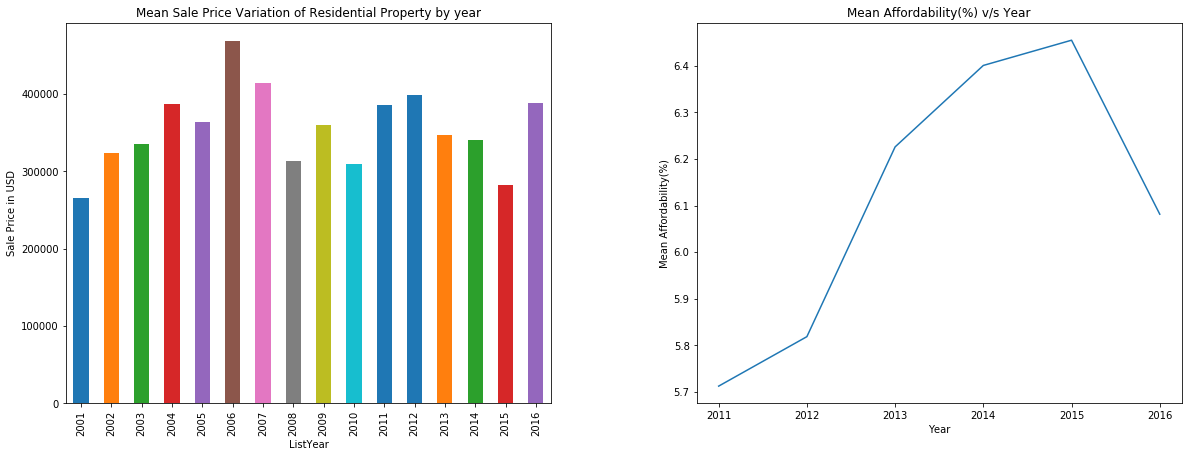

In [24]:
from pylab import rcParams
plt.subplot(1,2,1)
rcParams['figure.figsize'] = 15, 7
df_n1.groupby(['ListYear'])['SaleAmount'].mean().plot(kind='bar')
plt.ylabel('Sale Price in USD')
plt.title('Mean Sale Price Variation of Residential Property by year')
plt.subplot(1,2,2)
df.groupby(['Year'])['Percent Affordable'].mean().plot(kind='line')
plt.ylabel('Mean Affordability(%)')
plt.title('Mean Affordability(%) v/s Year')
plt.subplots_adjust(wspace=0.3)

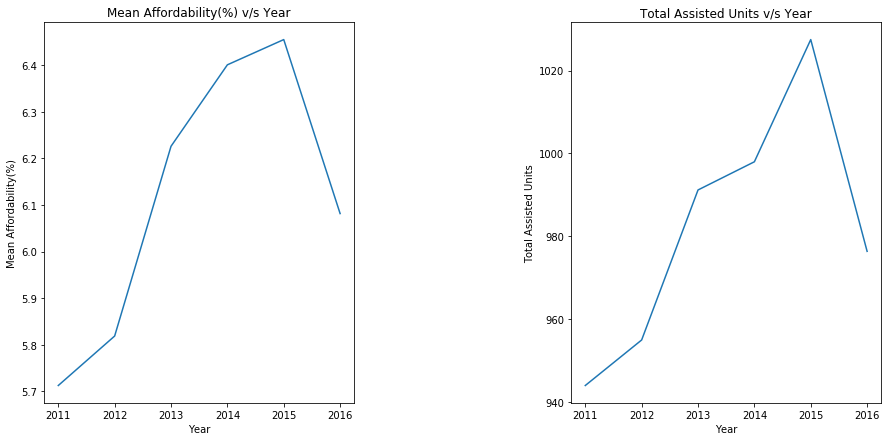

In [13]:
plt.subplot(1,2,1)
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.groupby(['Year'])['Percent Affordable'].mean().plot(kind='line')
plt.ylabel('Mean Affordability(%)')
plt.title('Mean Affordability(%) v/s Year')
plt.subplot(1,2,2)
y2 = df.groupby(['Year'])['Total Assisted Units'].mean().plot(kind='line')
plt.ylabel('Total Assisted Units')
plt.title('Total Assisted Units v/s Year')
plt.subplots_adjust(wspace=0.7)

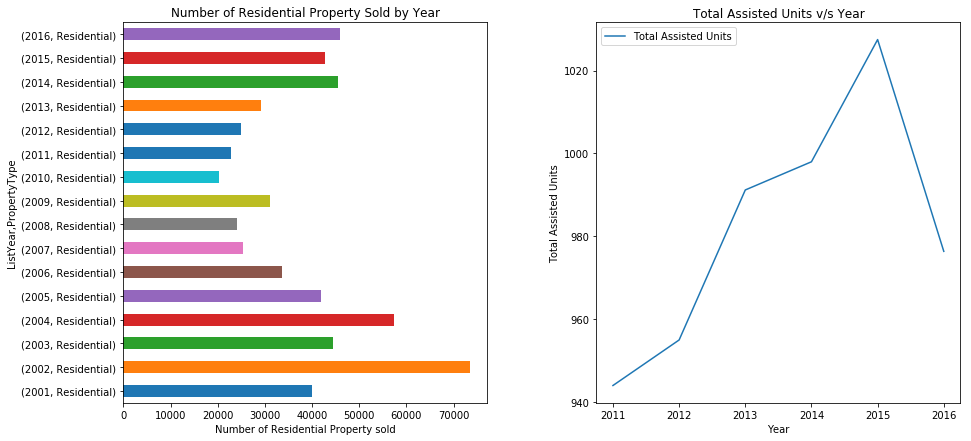

In [14]:
plt.subplot(1,2,1)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
df_realest = pd.read_csv('Real_Estate_Sales_2001-2016.csv')
df_n1 = df_realest.loc[df_realest['PropertyType']=='Residential']
df_n1.groupby(['ListYear'])['PropertyType'].value_counts().plot(kind='barh')
plt.title('Number of Residential Property Sold by Year')
plt.xlabel('Number of Residential Property sold')
plt.subplot(1,2,2)
y2 = df.groupby(['Year'])['Total Assisted Units'].mean().plot(kind='line', legend=True)
plt.ylabel('Total Assisted Units')
plt.title('Total Assisted Units v/s Year')
plt.subplots_adjust(wspace=0.3)

In [15]:
df['Gov-Assisted%'] = df['Gov Assisted']/df['Total Assisted Units']*100

In [16]:
df['Tenant-Assisted%'] = df['Tenant Rental Assistance']/df['Total Assisted Units']*100

In [17]:
df['CHFA/ USDA Mortgages%'] = df[' Single Family CHFA/ USDA Mortgages']/df['Total Assisted Units']*100

In [18]:
df.head()

,Code,Town,Year,2010 Census Units,Gov Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable,%AssistedUnits,Gov-Assisted%,Tenant-Assisted%,CHFA/ USDA Mortgages%
0,1,Andover,2016,1317,18,0,22,0,40.0,3.04,3.037206,45.000000,0.000000,55.000000
1,2,Ansonia,2016,8148,347,658,104,9,1118.0,13.72,13.721159,31.037567,58.855098,9.302326
2,3,Ashford,2016,1903,32,2,33,0,67.0,3.52,3.520757,47.761194,2.985075,49.253731
3,4,Avon,2016,7389,244,8,31,0,283.0,3.83,3.830018,86.219081,2.826855,10.954064
4,5,Barkhamsted,2016,1589,0,7,13,0,20.0,1.26,1.258653,0.000000,35.000000,65.000000


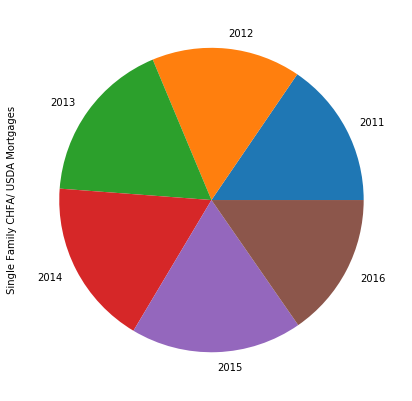

In [23]:
df.groupby(['Year'])[' Single Family CHFA/ USDA Mortgages'].sum().plot(kind='pie')

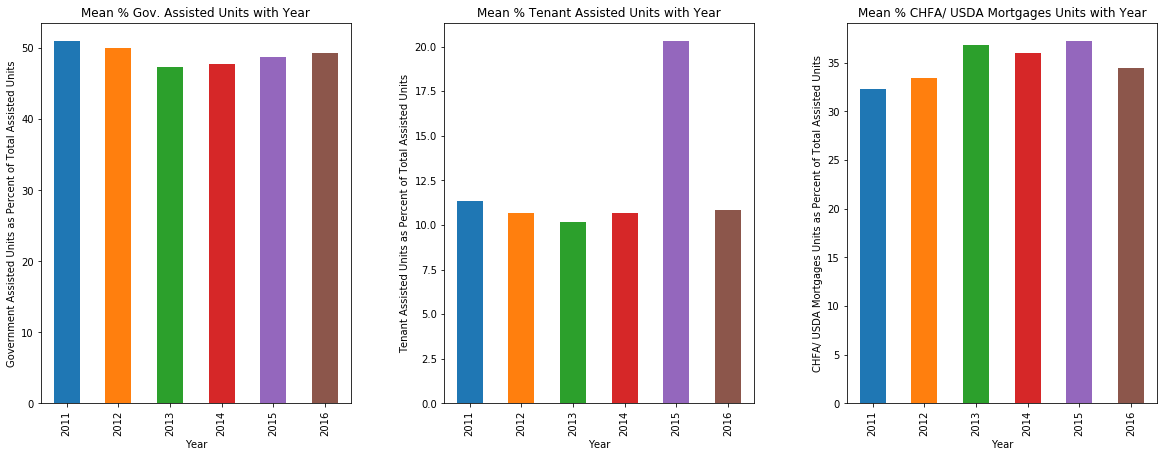

In [22]:
plt.subplot(1,3,1)
rcParams['figure.figsize'] = 20, 7
df.groupby(['Year'])['Gov-Assisted%'].mean().plot(kind='bar')
plt.ylabel('Government Assisted Units as Percent of Total Assisted Units')
plt.title('Mean % Gov. Assisted Units with Year')
plt.subplot(1,3,2)
df.groupby(['Year'])['Tenant-Assisted%'].mean().plot(kind='bar')
plt.ylabel('Tenant Assisted Units as Percent of Total Assisted Units')
plt.title('Mean % Tenant Assisted Units with Year')
plt.subplot(1,3,3)
df.groupby(['Year'])['CHFA/ USDA Mortgages%'].mean().plot(kind='bar')
plt.ylabel('CHFA/ USDA Mortgages Units as Percent of Total Assisted Units')
plt.title('Mean % CHFA/ USDA Mortgages Units with Year')
plt.subplots_adjust(wspace=0.3)